In [60]:
#standard import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# Iris sample
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [62]:
print(X_iris[0], y_iris[0])

[ 5.1  3.5  1.4  0.2] 0


In [63]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
X, y = X_iris[:, :2], y_iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


### feature scaling to avoid that features with large values may weight too much on the final results

In [64]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### visualization

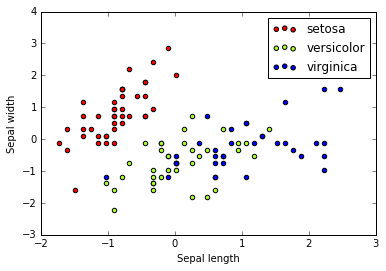

In [65]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [66]:
#from the picture, we know setosa can be separated
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)

[[-28.56232699  20.49537864]
 [ -0.74533565 -14.92334899]
 [ 22.98561916  -3.31899158]]


In [67]:
print(clf.intercept_)

[-17.59472179  -2.85433882 -10.28794775]


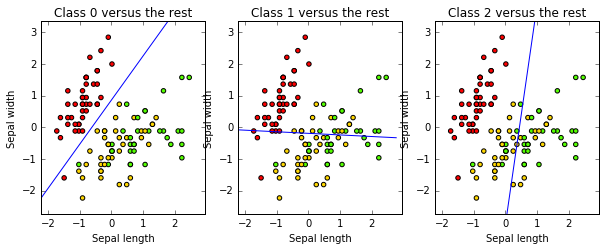

In [68]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min,y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys, hold=True)

In [69]:
print(clf.predict(scaler.transform([[4.7, 3.1],])))

[0]


In [70]:
print(clf.decision_function(scaler.transform([[4.7, 3.1],])))

[[ 20.31477878  -3.3246751  -39.5517534 ]]


In [71]:
#Evaluating our results
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.848214285714


In [72]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.684210526316


In [73]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.46      0.55      0.50        11
  virginica       0.71      0.63      0.67        19

avg / total       0.70      0.68      0.69        38



In [74]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  6  5]
 [ 0  7 12]]


In [75]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline
clf = Pipeline([('scaler', preprocessing.StandardScaler()), ('linear_model', SGDClassifier())])
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[ 0.73333333  0.66666667  0.8         0.76666667  0.76666667]


In [76]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.747 (+/- 0.023)
